In [2]:
import easydict
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from scipy import linalg
from PIL import Image
from skimage import io, img_as_float, img_as_uint
from skimage.metrics import structural_similarity as ssim

import torch
import torch.nn as nn
import timm

from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets
from torch import optim

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

import argparse
import random
import numpy as np
import os

from tqdm import tqdm
from glob import glob

import PIL.Image as Image
import copy

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [11]:
def img_snow(img, delta):

    
    p = 1 - delta
    red, green, blue = copy.deepcopy(img[:,:,0]), copy.deepcopy(img[:,:,1]), copy.deepcopy(img[:,:,2])
    height = red.shape[0]
    weight = red.shape[1]

    snow = []
    for i in range(int(p * height * weight)):
        snow_height = random.randint(0, height-1)
        snow_weight = random.randint(0, weight-1)
        snow.append((snow_height, snow_weight))

    for s_h, s_w in snow:
        red[s_h, s_w] = 127

    snow = []
    for i in range(int(p * height * weight)):
        snow_height = random.randint(0, height-1)
        snow_weight = random.randint(0, weight-1)
        snow.append((snow_height, snow_weight))

    for s_h, s_w in snow:
        green[s_h, s_w] = 127

    snow = []
    for i in range(int(p * height * weight)):
        snow_height = random.randint(0, height-1)
        snow_weight = random.randint(0, weight-1)
        snow.append((snow_height, snow_weight))

    for s_h, s_w in snow:
        blue[s_h, s_w] = 127

    fimg = np.zeros(img.shape)

    fimg[:,:,0], fimg[:,:,1], fimg[:,:,2] = red, green, blue

    for i in range(len(fimg)):
        for j in range(len(fimg[i])):
            for w in range(len(fimg[i][j])):
                fimg[i,j,w] = min(255, abs(fimg[i,j,w]))

    fimg = fimg.astype(np.uint8)
    return fimg

def dp_snow(images, delta):
    noisy_images = img_snow(images, delta)
#     display_image_grid(noisy_images)
    return noisy_images




def pillow_to_numpy(I):
    img = np.asarray(I, dtype=np.float32)
    return img

In [4]:
def pillow_to_numpy(I):
    img = np.asarray(I, dtype=np.float32)
    return img
delta_list = [-0.5, 0, 0.1, 0.3, 0.5, 0.7, 1.0, 2, 5, 100]
delta = 0.1
image = Image.open('/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/test/fake/875_979/0000.png')
a = pillow_to_numpy(image)
print(a.shape)

for i in delta_list:
    a = pillow_to_numpy(image)
    dpimg = dp_snow(a, i)
    dpimg = dpimg.astype('uint8')
#     cv2.imwrite('./kaia_figure/pix_eps_{}.png'.format(i), cv2.cvtColor(dpimg,cv2.COLOR_RGB2BGR))
    cv2.imwrite('./kaia_figure/snow/snow_delta_{}.png'.format(i), cv2.cvtColor(dpimg,cv2.COLOR_RGB2BGR))
# dpimg = dp_snow(a, delta)
# dpimg = dpimg.astype('uint8')
plt.imshow(dpimg)


FileNotFoundError: [Errno 2] No such file or directory: '/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/test/fake/875_979/0000.png'

### Apply snow on DF test images (fake & real)

done saving real snow files
done saving fake snow files


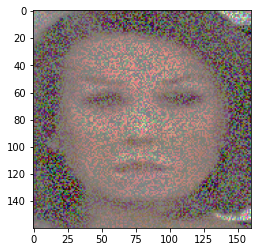

In [27]:
from glob import glob

delta = 0.1

df_imgdir = glob('/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/test/real/*/*')

for idx, img in enumerate(df_imgdir):
    image = Image.open(img)
    a = pillow_to_numpy(image)
    dpimg = dp_snow(a, delta)
    
    dpimg = dpimg.astype('uint8')
    
    plt.imshow(dpimg)
    cv2.imwrite('./df_snow/df_orig_snow/real/df_real_snow_{}.jpg'.format(idx),cv2.cvtColor(dpimg, cv2.COLOR_RGB2BGR))
    
print('done saving real snow files')   

df_fakeimgdir = glob('/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/test/fake/*/*')

for idx, img in enumerate(df_fakeimgdir):
    image = Image.open(img)
    a = pillow_to_numpy(image)
    dpimg = dp_snow(a, delta)
    
    dpimg = dpimg.astype('uint8')
    
    plt.imshow(dpimg)
    cv2.imwrite('./df_snow/df_orig_snow/fake/df_fake_snow_{}.jpg'.format(idx),cv2.cvtColor(dpimg, cv2.COLOR_RGB2BGR))

print('done saving fake snow files')
    

### Facemask image applying snow

Done saving fake mask snow images
Done saving real mask snow images


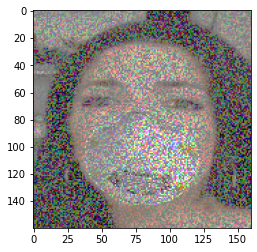

In [5]:
from glob import glob

delta = 0.1
fake_mask_dir = glob('/media/data1/donggeun/masked_test/FaceForensics++/DeepFake/fake/*/*')
real_mask_dir = glob('/media/data1/donggeun/masked_test/FaceForensics++/DeepFake/real/*/*')

for idx, img in enumerate(fake_mask_dir):
    image = Image.open(img)
    fake_mask = pillow_to_numpy(image)
    dpimg = dp_snow(fake_mask, delta)
    
    dpimg = dpimg.astype('uint8')
    
    plt.imshow(dpimg)
    cv2.imwrite('./df_snow/df_mask_snow/fake/df_mask_fake_snow_{}.jpg'.format(idx),cv2.cvtColor(dpimg, cv2.COLOR_RGB2BGR))

print('Done saving fake mask snow images')
    
for idx, img in enumerate(real_mask_dir):
    image = Image.open(img)
    real_mask = pillow_to_numpy(image)
    dpimg = dp_snow(real_mask, delta)
    
    dpimg = dpimg.astype('uint8')
    
    plt.imshow(dpimg)
    cv2.imwrite('./df_snow/df_mask_snow/real/df_mask_real_snow_{}.jpg'.format(idx),cv2.cvtColor(dpimg, cv2.COLOR_RGB2BGR))
    
print('Done saving real mask snow images')


/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/457/* glob folder
/home/data/privacy/snow/real/457 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/138/* glob folder
/home/data/privacy/snow/real/138 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/587/* glob folder
/home/data/privacy/snow/real/587 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/617/* glob folder
/home/data/privacy/snow/real/617 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/675/* glob folder
/home/data/privacy/snow/real/675 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/174/* glob folder
/home/data/privacy/snow/real/174 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/526/* glob folder
/home/data/privacy/snow/real/526 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/507/* 

/home/data/privacy/snow/real/709 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/239/* glob folder
/home/data/privacy/snow/real/239 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/359/* glob folder
/home/data/privacy/snow/real/359 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/152/* glob folder
/home/data/privacy/snow/real/152 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/746/* glob folder
/home/data/privacy/snow/real/746 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/141/* glob folder
/home/data/privacy/snow/real/141 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/330/* glob folder
/home/data/privacy/snow/real/330 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/137/* glob folder
/home/data/privacy/snow/real/137 sub folder
/media/data1/donggeun/FF_origina

/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/017/* glob folder
/home/data/privacy/snow/real/017 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/295/* glob folder
/home/data/privacy/snow/real/295 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/053/* glob folder
/home/data/privacy/snow/real/053 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/277/* glob folder
/home/data/privacy/snow/real/277 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/488/* glob folder
/home/data/privacy/snow/real/488 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/033/* glob folder
/home/data/privacy/snow/real/033 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/257/* glob folder
/home/data/privacy/snow/real/257 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/495/* 

/home/data/privacy/snow/real/206 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/671/* glob folder
/home/data/privacy/snow/real/671 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/180/* glob folder
/home/data/privacy/snow/real/180 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/246/* glob folder
/home/data/privacy/snow/real/246 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/054/* glob folder
/home/data/privacy/snow/real/054 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/266/* glob folder
/home/data/privacy/snow/real/266 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/386/* glob folder
/home/data/privacy/snow/real/386 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/255/* glob folder
/home/data/privacy/snow/real/255 sub folder
/media/data1/donggeun/FF_origina

/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/022/* glob folder
/home/data/privacy/snow/real/022 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/641/* glob folder
/home/data/privacy/snow/real/641 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/132/* glob folder
/home/data/privacy/snow/real/132 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/005/* glob folder
/home/data/privacy/snow/real/005 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/519/* glob folder
/home/data/privacy/snow/real/519 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/512/* glob folder
/home/data/privacy/snow/real/512 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/185/* glob folder
/home/data/privacy/snow/real/185 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/597/* 

/home/data/privacy/snow/real/021 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/618/* glob folder
/home/data/privacy/snow/real/618 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/577/* glob folder
/home/data/privacy/snow/real/577 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/181/* glob folder
/home/data/privacy/snow/real/181 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/407/* glob folder
/home/data/privacy/snow/real/407 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/391/* glob folder
/home/data/privacy/snow/real/391 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/298/* glob folder
/home/data/privacy/snow/real/298 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/093/* glob folder
/home/data/privacy/snow/real/093 sub folder
/media/data1/donggeun/FF_origina

/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/321/* glob folder
/home/data/privacy/snow/real/321 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/501/* glob folder
/home/data/privacy/snow/real/501 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/189/* glob folder
/home/data/privacy/snow/real/189 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/055/* glob folder
/home/data/privacy/snow/real/055 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/721/* glob folder
/home/data/privacy/snow/real/721 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/683/* glob folder
/home/data/privacy/snow/real/683 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/536/* glob folder
/home/data/privacy/snow/real/536 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/070/* 

/home/data/privacy/snow/real/202 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/706/* glob folder
/home/data/privacy/snow/real/706 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/370/* glob folder
/home/data/privacy/snow/real/370 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/306/* glob folder
/home/data/privacy/snow/real/306 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/387/* glob folder
/home/data/privacy/snow/real/387 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/336/* glob folder
/home/data/privacy/snow/real/336 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/656/* glob folder
/home/data/privacy/snow/real/656 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/697/* glob folder
/home/data/privacy/snow/real/697 sub folder
/media/data1/donggeun/FF_origina

/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/470/* glob folder
/home/data/privacy/snow/real/470 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/659/* glob folder
/home/data/privacy/snow/real/659 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/606/* glob folder
/home/data/privacy/snow/real/606 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/247/* glob folder
/home/data/privacy/snow/real/247 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/735/* glob folder
/home/data/privacy/snow/real/735 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/379/* glob folder
/home/data/privacy/snow/real/379 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/681/* glob folder
/home/data/privacy/snow/real/681 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/645/* 

/home/data/privacy/snow/real/153 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/008/* glob folder
/home/data/privacy/snow/real/008 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/693/* glob folder
/home/data/privacy/snow/real/693 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/485/* glob folder
/home/data/privacy/snow/real/485 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/660/* glob folder
/home/data/privacy/snow/real/660 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/508/* glob folder
/home/data/privacy/snow/real/508 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/201/* glob folder
/home/data/privacy/snow/real/201 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/067/* glob folder
/home/data/privacy/snow/real/067 sub folder
/media/data1/donggeun/FF_origina

/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/635/* glob folder
/home/data/privacy/snow/real/635 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/642/* glob folder
/home/data/privacy/snow/real/642 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/591/* glob folder
/home/data/privacy/snow/real/591 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/323/* glob folder
/home/data/privacy/snow/real/323 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/050/* glob folder
/home/data/privacy/snow/real/050 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/317/* glob folder
/home/data/privacy/snow/real/317 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/748/* glob folder
/home/data/privacy/snow/real/748 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/724/* 

/home/data/privacy/snow/real/729 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/638/* glob folder
/home/data/privacy/snow/real/638 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/738/* glob folder
/home/data/privacy/snow/real/738 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/193/* glob folder
/home/data/privacy/snow/real/193 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/047/* glob folder
/home/data/privacy/snow/real/047 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/625/* glob folder
/home/data/privacy/snow/real/625 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/564/* glob folder
/home/data/privacy/snow/real/564 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/455/* glob folder
/home/data/privacy/snow/real/455 sub folder
/media/data1/donggeun/FF_origina

######finished pixelation!!##########


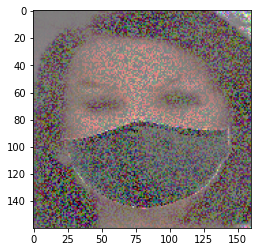

In [10]:
import os
df_imgdir = glob('/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/*/')
fake_img_dir = '/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/'

delta = 0.1

for idx, folder in enumerate(df_imgdir):
    
    # extract the last part of the folder for joining path
    imgfolder = folder.split('/')[-2]
    if not os.path.exists('/home/data/privacy/snow/real/{0}'.format(imgfolder)):
        os.makedirs(os.path.join('/home/data/privacy/snow/real/', imgfolder))
    subfolder = os.path.join('/home/data/privacy/snow/real/', imgfolder)
    
    # subfolder = location of saved area
    # globfolder = location of train data
    globfolder = fake_img_dir + imgfolder + '/*'
    
    print(globfolder, 'glob folder')
#     print(subfolder)
    # generating pixelation image per every image of each subfolder
    for idx2, img in enumerate(glob(globfolder)):
        image = Image.open(img)
        a = pillow_to_numpy(image)
        dpimg = dp_snow(fake_mask, delta)

    
        dpimg = dpimg.astype('uint8')
    
        plt.imshow(dpimg)
        cv2.imwrite(subfolder+'/folder_{0}_real_snow{1}.jpg'.format(idx, idx2),cv2.cvtColor(dpimg, cv2.COLOR_RGB2BGR))
        if idx2 == 10:
            print(subfolder, 'sub folder')
            
print('######finished pixelation!!##########')

##############################################################################################################################

### For train dataset generation

/home/data/deepfake_privacy/FF_original/FaceForensics++/DeepFake/test/real/978/* glob folder
/home/data/deepfake_privacy/ff_priv/DeepFake/snow/test/real/978 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/DeepFake/test/real/878/* glob folder
/home/data/deepfake_privacy/ff_priv/DeepFake/snow/test/real/878 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/DeepFake/test/real/992/* glob folder
/home/data/deepfake_privacy/ff_priv/DeepFake/snow/test/real/992 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/DeepFake/test/real/902/* glob folder
/home/data/deepfake_privacy/ff_priv/DeepFake/snow/test/real/902 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/DeepFake/test/real/961/* glob folder
/home/data/deepfake_privacy/ff_priv/DeepFake/snow/test/real/961 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/DeepFake/test/real/934/* glob folder
/home/data/deepfake_privacy/ff_priv/DeepFake/snow/test/real/934 sub

/home/data/deepfake_privacy/FF_original/FaceForensics++/DeepFake/test/real/910/* glob folder
/home/data/deepfake_privacy/ff_priv/DeepFake/snow/test/real/910 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/DeepFake/test/real/933/* glob folder
/home/data/deepfake_privacy/ff_priv/DeepFake/snow/test/real/933 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/DeepFake/test/real/986/* glob folder
/home/data/deepfake_privacy/ff_priv/DeepFake/snow/test/real/986 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/DeepFake/test/real/907/* glob folder
/home/data/deepfake_privacy/ff_priv/DeepFake/snow/test/real/907 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/DeepFake/test/real/895/* glob folder
/home/data/deepfake_privacy/ff_priv/DeepFake/snow/test/real/895 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/DeepFake/test/real/920/* glob folder
/home/data/deepfake_privacy/ff_priv/DeepFake/snow/test/real/920 sub

/home/data/deepfake_privacy/FF_original/FaceForensics++/DeepFake/test/real/898/* glob folder
/home/data/deepfake_privacy/ff_priv/DeepFake/snow/test/real/898 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/DeepFake/test/real/995/* glob folder
/home/data/deepfake_privacy/ff_priv/DeepFake/snow/test/real/995 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/DeepFake/test/real/876/* glob folder
/home/data/deepfake_privacy/ff_priv/DeepFake/snow/test/real/876 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/DeepFake/test/real/915/* glob folder
/home/data/deepfake_privacy/ff_priv/DeepFake/snow/test/real/915 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/DeepFake/test/real/974/* glob folder
/home/data/deepfake_privacy/ff_priv/DeepFake/snow/test/real/974 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/DeepFake/test/real/938/* glob folder
/home/data/deepfake_privacy/ff_priv/DeepFake/snow/test/real/938 sub

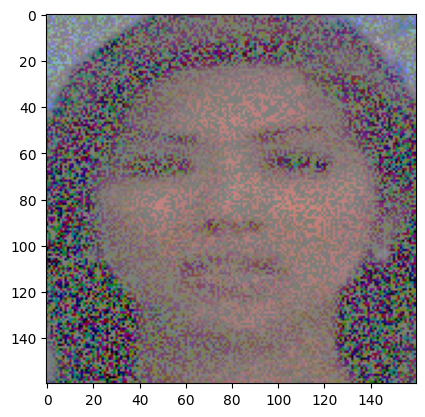

In [16]:
import os
df_imgdir = glob('/home/data/deepfake_privacy/FF_original/FaceForensics++/DeepFake/test/real/*/')
fake_img_dir = '/home/data/deepfake_privacy/FF_original/FaceForensics++/DeepFake/test/real/'

delta = 0.1


for idx, folder in enumerate(df_imgdir):
    
    # extract the last part of the folder for joining path
    imgfolder = folder.split('/')[-2]
    if not os.path.exists('/home/data/deepfake_privacy/ff_priv/DeepFake/snow/test/real/{0}'.format(imgfolder)):
        os.makedirs(os.path.join('/home/data/deepfake_privacy/ff_priv/DeepFake/snow/test/real/', imgfolder))
    subfolder = os.path.join('/home/data/deepfake_privacy/ff_priv/DeepFake/snow/test/real/', imgfolder)
    
    
    # subfolder = location of saved area
    # globfolder = location of train data
    globfolder = fake_img_dir + imgfolder + '/*'
    
    print(globfolder, 'glob folder')
#     print(subfolder)
    # generating pixelation image per every image of each subfolder
    for idx2, img in enumerate(glob(globfolder)):
        image = Image.open(img)
        a = pillow_to_numpy(image)
        dpimg = dp_snow(a, delta)

    
        dpimg = dpimg.astype('uint8')
    
        plt.imshow(dpimg)
        cv2.imwrite(subfolder+'/folder_{0}_test_real_snow{1}.jpg'.format(idx, idx2),cv2.cvtColor(dpimg, cv2.COLOR_RGB2BGR))
        if idx2 == 10:
            print(subfolder, 'sub folder')
            
print('######finished svd train!!##########')

##############################################################################################################################